In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
df = pd.read_csv("../data/benin-malanville.csv") 


In [3]:
# Summary statistics
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [4]:
# Missing value report
missing = df.isna().sum()
missing[missing > 0]  # Only display columns with missing values


Comments    525600
dtype: int64

In [5]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[columns_to_check].dropna()))
outliers = (z_scores > 3)
outlier_counts = pd.DataFrame(outliers, columns=columns_to_check).sum()
outlier_counts


GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

In [6]:
# Drop rows with extreme outliers
df_cleaned = df[(z_scores < 3).all(axis=1)]

# Fill missing values in important columns with median
for col in columns_to_check:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())


C:\Users\cv\AppData\Local\Temp\ipykernel_3584\1228425142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
C:\Users\cv\AppData\Local\Temp\ipykernel_3584\1228425142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
C:\Users\cv\AppData\Local\Temp\ipykernel_3584\1228425142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [7]:
df_cleaned.to_csv("../data/benin_clean.csv", index=False)


C:\Users\cv\AppData\Local\Temp\ipykernel_3584\299182396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
c:\Users\cv\Documents\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


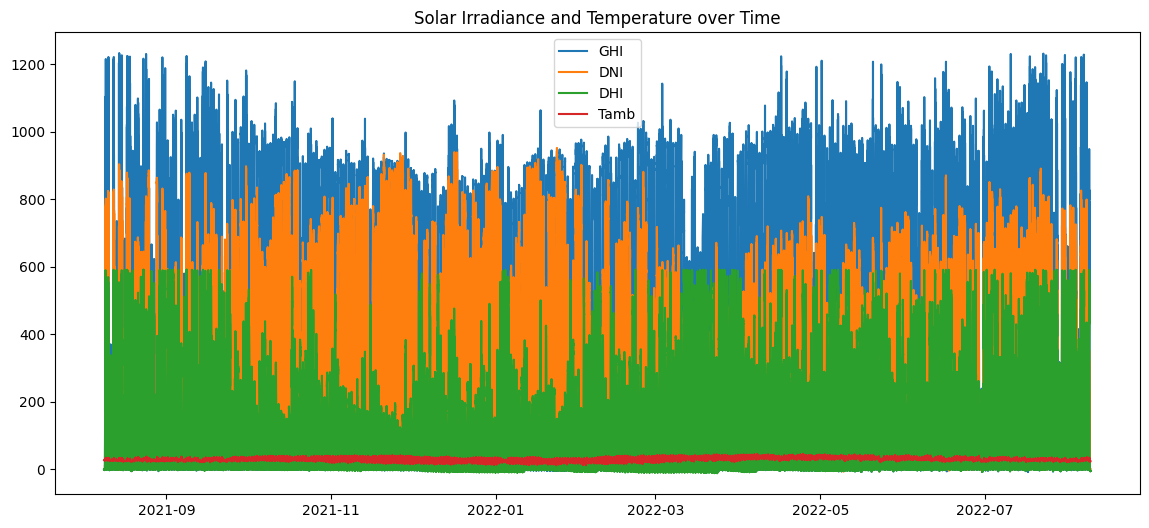

In [8]:
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

# Plot solar values
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_cleaned['Timestamp'], df_cleaned[col], label=col)
plt.legend()
plt.title("Solar Irradiance and Temperature over Time")
plt.show()


Text(0.5, 1.0, 'Module A & B Output Before/After Cleaning')

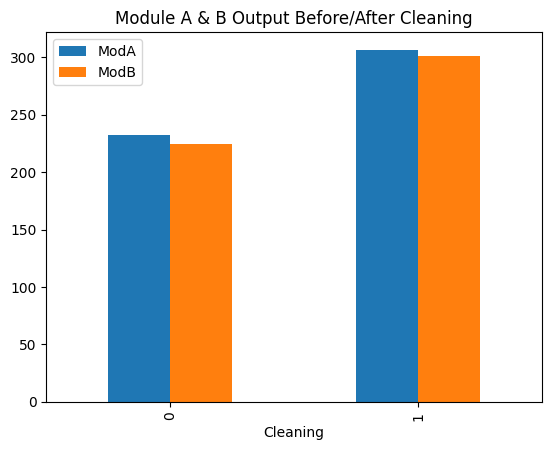

In [9]:
df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Module A & B Output Before/After Cleaning")


<Axes: title={'center': 'Correlation Heatmap'}, xlabel='WS', ylabel='GHI'>

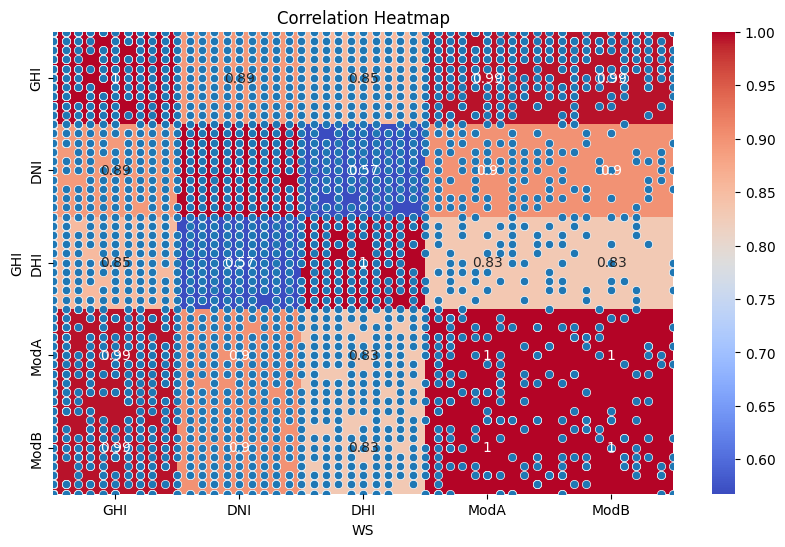

In [10]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

# Scatter plots
sns.scatterplot(data=df_cleaned, x='WS', y='GHI')
sns.scatterplot(data=df_cleaned, x='RH', y='Tamb')


Text(0.5, 1.0, 'Distribution of GHI')

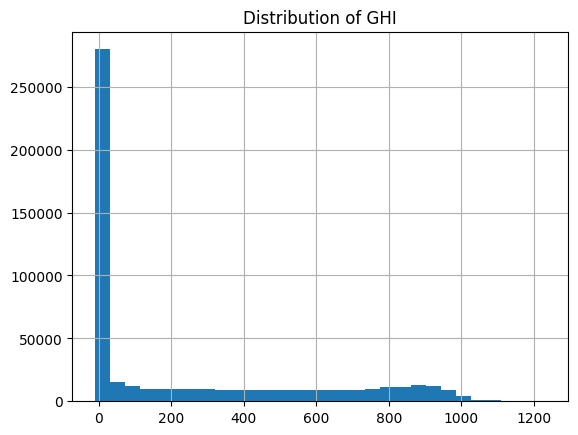

In [11]:
# Histogram
df_cleaned['GHI'].hist(bins=30)
plt.title("Distribution of GHI")




Text(0.5, 1.0, 'Bubble Chart: GHI vs Tamb (size = RH)')

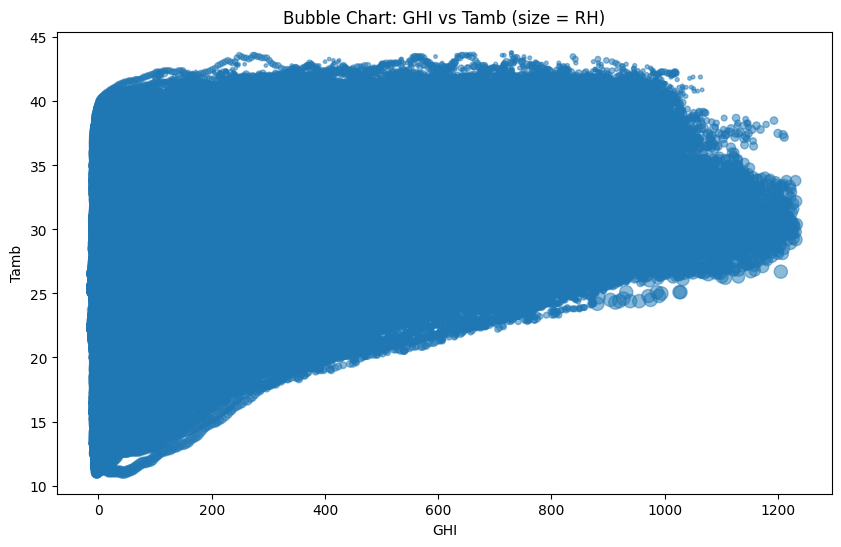

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], s=df_cleaned['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("Bubble Chart: GHI vs Tamb (size = RH)")
